In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [30]:
# === Load Model Predictions ===
# Load GARCH & Heston predictions
df_garch_heston = pd.read_csv("volatility_predictions.csv", index_col=0, parse_dates=True)


In [32]:
# Load LSTM predictions
df_lstm_pred = pd.read_csv("lstm_volatility_predictions.csv", index_col=0, parse_dates=True)


In [33]:
# Keep only data from 2022-10-27 onward
df_garch_heston = df_garch_heston[df_garch_heston.index >= "2022-10-27"]


In [34]:
# Merge datasets correctly
df_compare = df_garch_heston.join(df_lstm_pred, how="left")


In [35]:
# Rename column for consistency
df_compare.rename(columns={"Predicted Volatility (LSTM)": "LSTM_Volatility"}, inplace=True)


In [36]:
# === Handle Missing Values ===
df_compare["LSTM_Volatility"].fillna(method="ffill", inplace=True)
df_compare["Actual Volatility"].fillna(method="ffill", inplace=True)


In [37]:
# Drop any remaining NaNs (if necessary)
df_compare.dropna(inplace=True)


In [38]:
# === Compute Model Performance Metrics ===
def calculate_rmse(actual, predicted, model_name):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print(f"{model_name} RMSE: {rmse:.6f}")
    return rmse


In [39]:
# Calculate RMSE for each model
rmse_garch = calculate_rmse(df_compare["Rolling_Volatility"], df_compare["GARCH_Volatility"], "GARCH")
rmse_heston = calculate_rmse(df_compare["Rolling_Volatility"], df_compare["Heston_Volatility"], "Heston")
rmse_lstm = calculate_rmse(df_compare["Rolling_Volatility"], df_compare["LSTM_Volatility"], "LSTM")


GARCH RMSE: 0.039397
Heston RMSE: 2.162805
LSTM RMSE: 0.006964


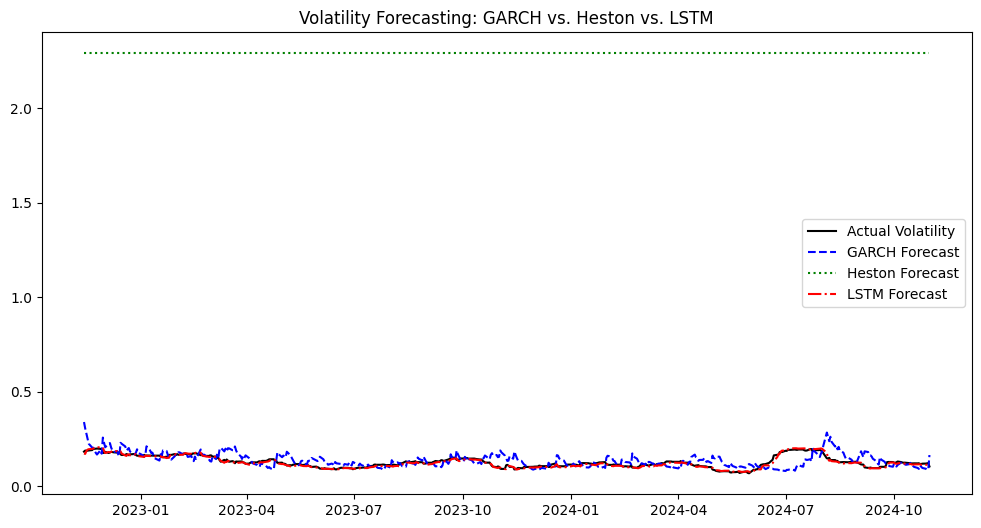

In [40]:
# === Visualize Model Comparison ===
plt.figure(figsize=(12, 6))
plt.plot(df_compare.index, df_compare["Rolling_Volatility"], label="Actual Volatility", color="black")
plt.plot(df_compare.index, df_compare["GARCH_Volatility"], label="GARCH Forecast", linestyle="dashed", color="blue")
plt.plot(df_compare.index, df_compare["Heston_Volatility"], label="Heston Forecast", linestyle="dotted", color="green")
plt.plot(df_compare.index, df_compare["LSTM_Volatility"], label="LSTM Forecast", linestyle="dashdot", color="red")
plt.title("Volatility Forecasting: GARCH vs. Heston vs. LSTM")
plt.legend()
plt.show()


In [41]:
# Save results
df_compare.to_csv("final_volatility_comparison.csv")
print("Final volatility comparison results saved!")


Final volatility comparison results saved!
